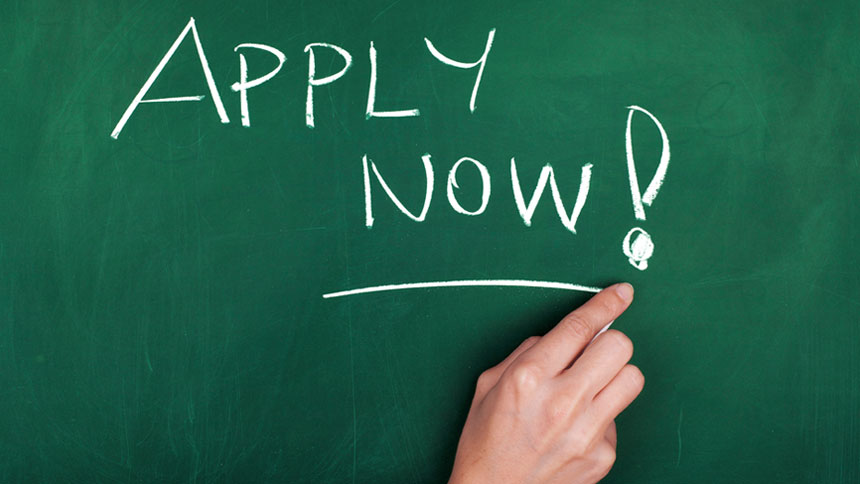

# **Objective**


Develop a Python script to scrape job listings from the "Wuzzuf" website. The script should extract specified features from each job listing using the requests and BeautifulSoup libraries, handle pagination to traverse multiple pages of listings, and save the extracted data into a CSV file on Google Drive.

By implementing this script, we aim to automate the process of scraping job listings from "Wuzzuf", extracting detailed job information, and storing it in a structured format for further analysis or usage. This solution will facilitate easy and efficient data collection from the "Wuzzuf" website.

# **Extracted Features and Description**

Job Title: The name or designation of the job position being advertised.

Company Name: The name of the organization or business that is offering the job.
    
Location: The physical place where the job is located. This feature will be further parsed into:
        Country: The country where the job is based.
        City: The city within the country where the job is located.
        Area: A more specific locality or region within the city.

Workplace Type: The type of work environment or location for the job. It may specify whether the job is onsite, remote, or hybrid.
   
Career Level: The level of seniority or experience required for the job. This indicates whether the job is for entry-level candidates, experienced professionals, or senior executives.
   
Years of Experience: The amount of professional experience required or preferred for the job. This can help candidates assess if they meet the experience criteria for the position.
   
Job Category: The functional area or industry sector to which the job belongs. This categorizes the job based on the type of work and the skills required.
    
Job Type: The nature of the job in terms of employment status. This specifies whether the job is full-time, part-time, contract-based, or internship.

Date Posted: The date on which the job listing was posted or published. This helps in identifying the recency of the job posting.

# **Library Installation**

In [41]:
!pip install requests

In [42]:
!pip install beautifulsoup4

In [43]:
!pip install lxml

# **Import Libraries**

In [44]:
import requests
from bs4 import BeautifulSoup
import csv
from itertools import zip_longest

# **Scraping**

In [45]:
# Base URL of the job search page
base_url = "https://wuzzuf.net/search/jobs/?a=hpb&q=&start="


In [46]:
# Lists to hold the aggregated extracted data
job_titles = []
company_names = []
locations = []
career_levels = []
years_of_experience = []
job_categories = []
job_types = []
dates_posted = []

In [47]:
# Loop through the first 50 pages
for page in range(0, 50):
    url = base_url + str(page * 15)  # Each page starts at multiples of 15
    response = requests.get(url)
    if response.status_code == 200:
        print(f"Successfully fetched page {page + 1}")
    else:
        print(f"Failed to fetch page {page + 1}")
        continue

    # Parse the webpage content
    soup = BeautifulSoup(response.content, "lxml")

    # Find all job listings on the page
    job_listings = soup.find_all("div", class_="css-1gatmva e1v1l3u10")

    # Loop through each job listing and extract the required information
    for job in job_listings:
        # Job title
        title = job.find("h2", class_="css-m604qf")
        job_titles.append(title.text.strip() if title else 'N/A')

        # Company name
        company = job.find("a", class_="css-17s97q8")
        company_names.append(company.text.strip() if company else 'N/A')

        # Location
        location = job.find("span", class_="css-5wys0k")
        locations.append(location.text.strip() if location else 'N/A')

        # Career level
        career_level = job.find("span", class_="css-1ve4b75")
        career_levels.append(career_level.text.strip() if career_level else 'N/A')

        # Years of experience
        experience = job.find("div", class_="css-y4udm8")
        if experience:
            exp_text = experience.text.strip().split('·')
            years_of_experience.append(exp_text[1].strip() if len(exp_text) > 1 else 'N/A')
        else:
            years_of_experience.append('N/A')

        # Job category
        category = job.find("a", class_="css-o171kl")
        job_categories.append(category.text.strip() if category else 'N/A')

        # Job type
        job_type = job.find("span", class_="css-1ve4b75")
        if job_type:
            type_text = job_type.text.strip().split('·')
            job_types.append(type_text[0].strip() if len(type_text) > 0 else 'N/A')
        else:
            job_types.append('N/A')

        # Date posted
        date_posted = job.find("div", class_="css-do6t5g")
        dates_posted.append(date_posted.text.strip() if date_posted else 'N/A')

Successfully fetched page 1
Successfully fetched page 2
Successfully fetched page 3
Successfully fetched page 4
Successfully fetched page 5
Successfully fetched page 6
Successfully fetched page 7
Successfully fetched page 8
Successfully fetched page 9
Successfully fetched page 10
Successfully fetched page 11
Successfully fetched page 12
Successfully fetched page 13
Successfully fetched page 14
Successfully fetched page 15
Successfully fetched page 16
Successfully fetched page 17
Successfully fetched page 18
Successfully fetched page 19
Successfully fetched page 20
Successfully fetched page 21
Successfully fetched page 22
Successfully fetched page 23
Successfully fetched page 24
Successfully fetched page 25
Successfully fetched page 26
Successfully fetched page 27
Successfully fetched page 28
Successfully fetched page 29
Successfully fetched page 30
Successfully fetched page 31
Successfully fetched page 32
Successfully fetched page 33
Successfully fetched page 34
Successfully fetched pa

In [48]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Combine the lists into rows
rows = zip_longest(job_titles, company_names, locations, career_levels, years_of_experience, job_categories, job_types, dates_posted)

# Define the path of the CSV file
file_path = "/content/drive/MyDrive/jobsearch_dataframe.csv"

# Write the data to a CSV file
with open(file_path, "w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Job Title", "Company Name", "Location", "Career Level", "Years of Experience", "Job Category", "Job Type", "Date Posted"])
    writer.writerows(rows)

print(f"Data has been successfully written to {file_path}.")

Data has been successfully written to /content/drive/MyDrive/jobsearch_dataframe.csv.


# **Data Exploration**

In [50]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the data
df = pd.read_csv('/content/jobsearch_dataframe.csv')

In [52]:
df.head()

,Job Title,Company Name,Location,Career Level,Years of Experience,Job Category,Job Type,Date Posted
0,District Sales Manager,Helian company -,"Cairo, Egypt",Full Time,5 - 7 Yrs of Exp,District Sales Manager,Full Time,NaN
1,Call Center Advisor,Confidential -,"Nasr City, Cairo, Egypt",Full Time,1 - 2 Yrs of Exp,Call Center Advisor,Full Time,NaN
2,Sales Executive - Key Account Manager,Confidential -,"Cairo, Egypt",Full Time,4 - 6 Yrs of Exp,Sales Executive - Key Account Manager,Full Time,NaN
3,Warehouse Keeper,Confidential -,"Beheira, Egypt",Full Time,2 - 4 Yrs of Exp,Warehouse Keeper,Full Time,NaN
4,Customer Service Advisor- English Account (UAE...,Etisalat Egypt -,"Maadi, Cairo, Egypt",Full Time,0 - 10 Yrs of Exp,Customer Service Advisor- English Account (UAE...,Full Time,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job Title            750 non-null    object
 1   Company Name         750 non-null    object
 2   Location             750 non-null    object
 3   Career Level         750 non-null    object
 4   Years of Experience  750 non-null    object
 5   Job Category         750 non-null    object
 6   Job Type             750 non-null    object
 7   Date Posted          540 non-null    object
dtypes: object(8)
memory usage: 47.0+ KB


# **Data Preprocessing**

In [54]:
# Check for missing values
df.isnull().sum()

Job Title                0
Company Name             0
Location                 0
Career Level             0
Years of Experience      0
Job Category             0
Job Type                 0
Date Posted            210
dtype: int64

In [55]:
# Function to split the location into state and country
def split_location(location):
    if pd.isna(location):
        return 'Unknown', 'Unknown'
    parts = location.split(',')
    if len(parts) == 2:
        state = parts[0].strip()
        country = parts[1].strip()
    elif len(parts) == 3:
        state = parts[1].strip()
        country = parts[2].strip()
    else:
        state = location.strip()
        contry = 'Unknown'
    return state, country

In [56]:
# Apply the split function to the Location column
df[['State', 'Country']] = df['Location'].apply(lambda x: pd.Series(split_location(x)))

In [57]:
# Drop the original Location column
df = df.drop(columns=['Location'])

In [58]:
df.head()

,Job Title,Company Name,Career Level,Years of Experience,Job Category,Job Type,Date Posted,State,Country
0,District Sales Manager,Helian company -,Full Time,5 - 7 Yrs of Exp,District Sales Manager,Full Time,NaN,Cairo,Egypt
1,Call Center Advisor,Confidential -,Full Time,1 - 2 Yrs of Exp,Call Center Advisor,Full Time,NaN,Cairo,Egypt
2,Sales Executive - Key Account Manager,Confidential -,Full Time,4 - 6 Yrs of Exp,Sales Executive - Key Account Manager,Full Time,NaN,Cairo,Egypt
3,Warehouse Keeper,Confidential -,Full Time,2 - 4 Yrs of Exp,Warehouse Keeper,Full Time,NaN,Beheira,Egypt
4,Customer Service Advisor- English Account (UAE...,Etisalat Egypt -,Full Time,0 - 10 Yrs of Exp,Customer Service Advisor- English Account (UAE...,Full Time,NaN,Cairo,Egypt


In [59]:
# Function to clean the company name
def clean_company_name(company_name):
    if pd.isna(company_name):
        return 'Unknown'
    # Remove the trailing hyphen and any surrounding whitespace
    cleaned_name = company_name.rstrip(' -').strip()
    return cleaned_name.title()

# Apply the clean function to the Company Name column
df['Company Name'] = df['Company Name'].apply(clean_company_name)



In [60]:
df.head()

,Job Title,Company Name,Career Level,Years of Experience,Job Category,Job Type,Date Posted,State,Country
0,District Sales Manager,Helian Company,Full Time,5 - 7 Yrs of Exp,District Sales Manager,Full Time,NaN,Cairo,Egypt
1,Call Center Advisor,Confidential,Full Time,1 - 2 Yrs of Exp,Call Center Advisor,Full Time,NaN,Cairo,Egypt
2,Sales Executive - Key Account Manager,Confidential,Full Time,4 - 6 Yrs of Exp,Sales Executive - Key Account Manager,Full Time,NaN,Cairo,Egypt
3,Warehouse Keeper,Confidential,Full Time,2 - 4 Yrs of Exp,Warehouse Keeper,Full Time,NaN,Beheira,Egypt
4,Customer Service Advisor- English Account (UAE...,Etisalat Egypt,Full Time,0 - 10 Yrs of Exp,Customer Service Advisor- English Account (UAE...,Full Time,NaN,Cairo,Egypt


In [61]:
# Function to extract min and max years of experience
def extract_years(exp_str):
    if '-' in exp_str:
        return list(map(int, re.findall(r'\d+', exp_str)))
    elif '+' in exp_str:
        min_year = int(re.findall(r'\d+', exp_str)[0])
        return [min_year, 99]  # Assuming 99 as a placeholder for open-ended experience
    else:
        return [None, None]

# Filter out invalid rows
df = df[df['Years of Experience'].str.contains(r'\d+')]

# Apply the function to create new columns
df[['Min Years of Experience', 'Max Years of Experience']] = pd.DataFrame(df['Years of Experience'].apply(extract_years).tolist(), index=df.index)

# Convert to integers, handle cases with missing values
df['Min Years of Experience'] = df['Min Years of Experience'].astype('Int64')
df['Max Years of Experience'] = df['Max Years of Experience'].astype('Int64')


<ipython-input-61-a933d002359f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Min Years of Experience', 'Max Years of Experience']] = pd.DataFrame(df['Years of Experience'].apply(extract_years).tolist(), index=df.index)
<ipython-input-61-a933d002359f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Min Years of Experience', 'Max Years of Experience']] = pd.DataFrame(df['Years of Experience'].apply(extract_years).tolist(), index=df.index)
<ipython-input-61-a933d002359f>:18: SettingWithCopyWar

In [62]:
# Drop the Job Category column
df.drop(columns=['Job Category'])

<ipython-input-62-b1792a427345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Job Category'], inplace=True)


In [66]:
df.drop(columns=['Career Level'])

,Job Title,Company Name,Years of Experience,Job Type,Date Posted,State,Country,Min Years of Experience,Max Years of Experience
0,District Sales Manager,Helian Company,5 - 7 Yrs of Exp,Full Time,NaN,Cairo,Egypt,5,7
1,Call Center Advisor,Confidential,1 - 2 Yrs of Exp,Full Time,NaN,Cairo,Egypt,1,2
2,Sales Executive - Key Account Manager,Confidential,4 - 6 Yrs of Exp,Full Time,NaN,Cairo,Egypt,4,6
3,Warehouse Keeper,Confidential,2 - 4 Yrs of Exp,Full Time,NaN,Beheira,Egypt,2,4
4,Customer Service Advisor- English Account (UAE...,Etisalat Egypt,0 - 10 Yrs of Exp,Full Time,NaN,Cairo,Egypt,0,10
...,...,...,...,...,...,...,...,...,...
745,Part-time Kids English Instructor -Maadi - Reh...,Berlitz Egypt,0 - 5 Yrs of Exp,Part Time,2 months ago,Cairo,Egypt,0,5
746,Sales Representative,Pannelli,1 - 5 Yrs of Exp,Full Time,2 months ago,Cairo,Egypt,1,5
747,Technical Support Engineer,Audio Technology,3+ Yrs of Exp,Full Time,2 months ago,Cairo,Egypt,3,99
748,Sr. / Oracle Apps Developer,Egypt Kuwait Holding,5 - 10 Yrs of Exp,Full Time,2 months ago,Cairo,Egypt,5,10


In [67]:
df.head()

,Job Title,Company Name,Career Level,Years of Experience,Job Type,Date Posted,State,Country,Min Years of Experience,Max Years of Experience
0,District Sales Manager,Helian Company,Full Time,5 - 7 Yrs of Exp,Full Time,NaN,Cairo,Egypt,5,7
1,Call Center Advisor,Confidential,Full Time,1 - 2 Yrs of Exp,Full Time,NaN,Cairo,Egypt,1,2
2,Sales Executive - Key Account Manager,Confidential,Full Time,4 - 6 Yrs of Exp,Full Time,NaN,Cairo,Egypt,4,6
3,Warehouse Keeper,Confidential,Full Time,2 - 4 Yrs of Exp,Full Time,NaN,Beheira,Egypt,2,4
4,Customer Service Advisor- English Account (UAE...,Etisalat Egypt,Full Time,0 - 10 Yrs of Exp,Full Time,NaN,Cairo,Egypt,0,10


In [68]:
df.describe()

,Min Years of Experience,Max Years of Experience
count,510.0,510.0
mean,3.239216,12.52549
std,2.895297,23.474568
min,0.0,1.0
25%,1.0,4.0
50%,2.0,5.0
75%,4.0,10.0
max,18.0,99.0


# **Exploratory Data Analysis**

**Distributions of categorical features like 'State'**

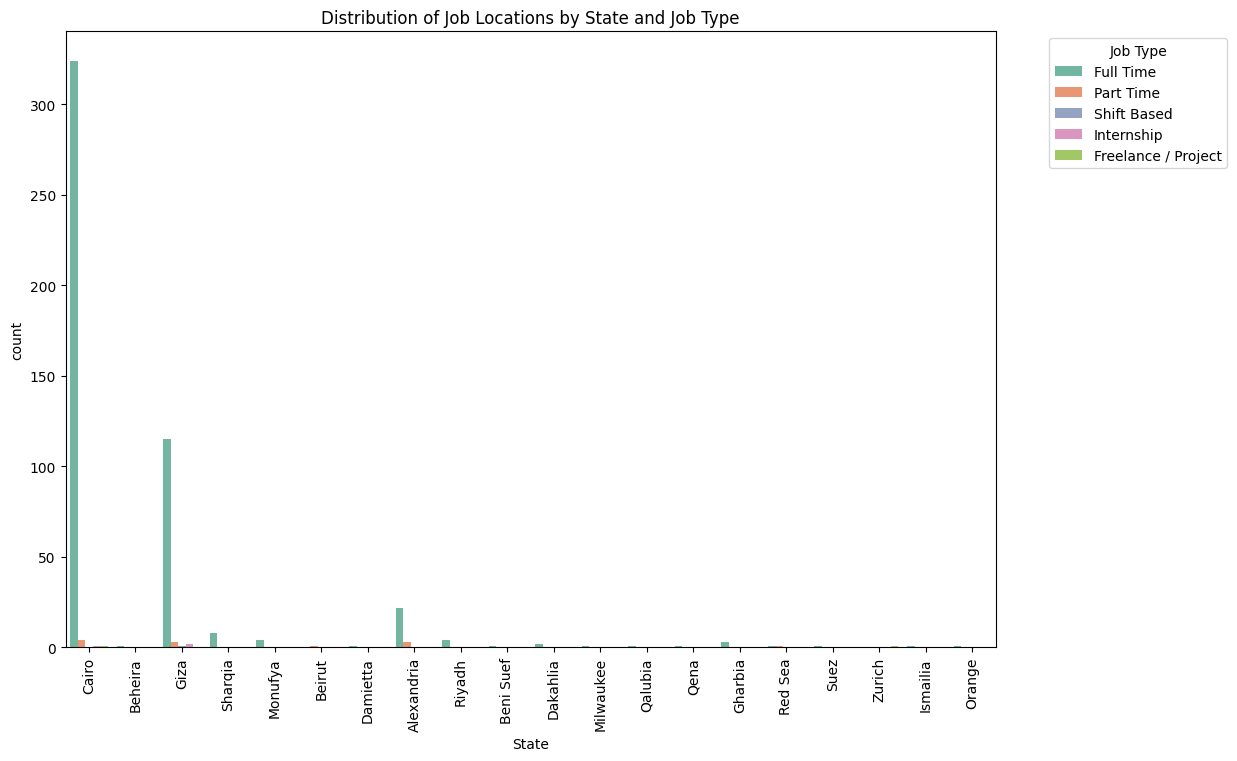

In [75]:
# Plotting the stacked bar chart for the distribution of job locations by state and career level
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='State', hue='Job Type', palette='Set2')
plt.title('Distribution of Job Locations by State and Job Type')
plt.xticks(rotation=90)
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight:** Analyzing the jobsearch dataset, it is evident that Cairo stands out as the most common job location, reflecting its role as a central hub for employment opportunities in Egypt. The majority of positions listed are for full-time roles, predominantly in the fields of customer service and sales, indicating a high demand for these skills in the capital. Notably, the range of experience required varies widely, with both entry-level and experienced positions available, suggesting that Cairo offers opportunities for professionals at different stages of their careers. This diversity in jobsearch highlights Cairo's dynamic job market, catering to a broad spectrum of career levels and industries.

**Examine relationships between features using correlation heatmaps.**

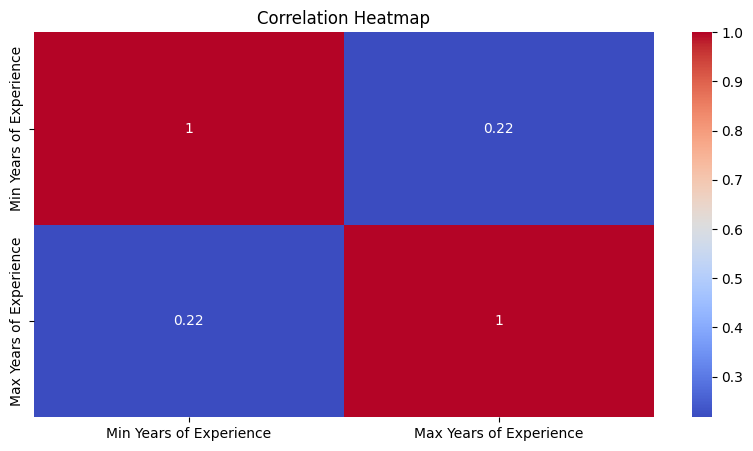

In [76]:
# Plotting correlation heatmap for numeric features
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Min Years of Experience', 'Max Years of Experience']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight:** The jobsearch dataset reveals a positive correlation between the minimum and maximum years of experience required for positions, as expected. This indicates that roles demanding higher minimum experience levels also tend to set higher maximum experience thresholds, reflecting the increasing complexity and responsibility associated with more advanced positions. Such a trend underscores the importance of accumulated experience in career progression and skill development. Consequently, job seekers can see a clear pathway where gaining experience directly translates into eligibility for roles with greater responsibilities and opportunities.

**Examine relationships between features using correlation boxplots.**

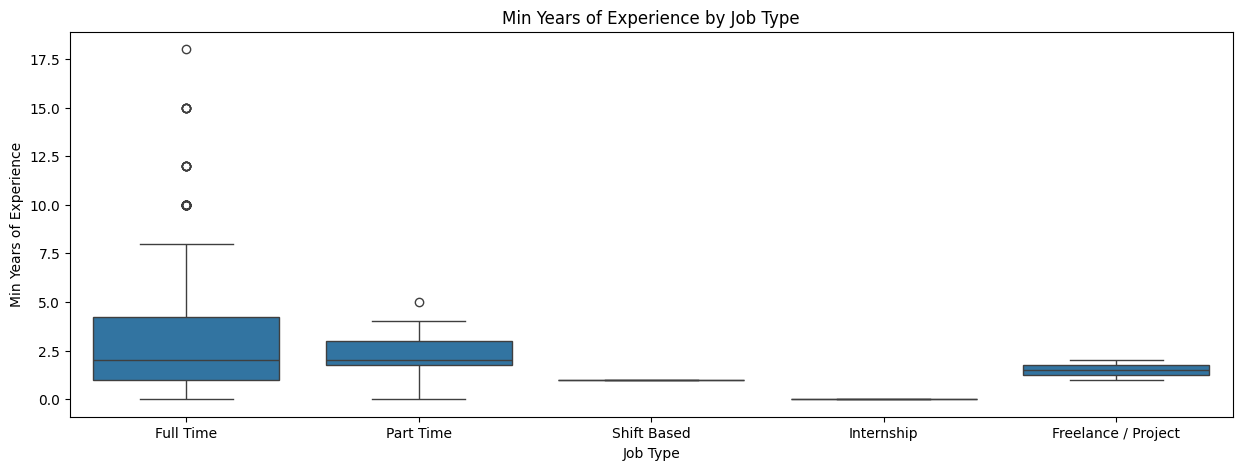

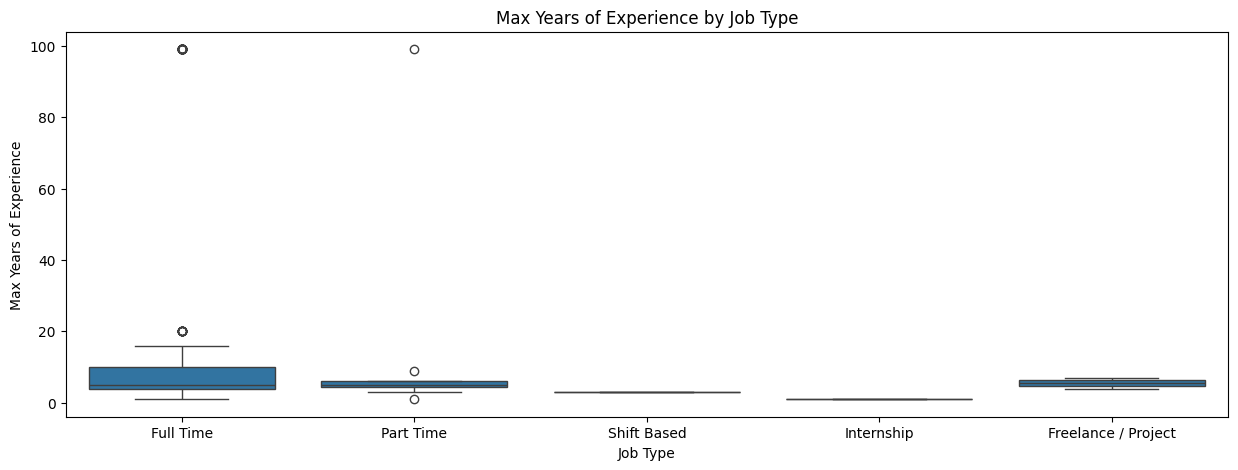

In [79]:
# Boxplot of 'Min Years of Experience' by 'Job Type'
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Job Type', y='Min Years of Experience')
plt.title('Min Years of Experience by Job Type')
plt.show()

# Boxplot of 'Max Years of Experience' by 'Job Type'
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Job Type', y='Max Years of Experience')
plt.title('Max Years of Experience by Job Type')
plt.show()

**Insight:** The box plots reveal that senior roles generally have higher minimum and maximum years of experience compared to entry-level positions. This helps us understand the progression and requirements within career hierarchies. Additionally, these visualizations highlight the range and outliers in experience requirements, providing a clearer picture of job market expectations for various career stages.